<a href="https://colab.research.google.com/github/Blackphoenix-15/Network-Intrusion-Detection/blob/main/network_intrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:07<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1


In [ ]:
import pandas as pd
import os

# Path to the downloaded dataset
dataset_path = "/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1"

# List all files in the directory to identify the CSV file
print(os.listdir(dataset_path))

# Typically, the main file is named 'UNSW_NB15.csv' or similar
# If there's a zip file, you'll need to extract it first
csv_file_path = os.path.join(dataset_path, "UNSW_NB15.csv")

# Load the CSV into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(df.head())
except FileNotFoundError:
    print("CSV file not found at the specified path. Checking for zip file...")

    # If the file is zipped
    import zipfile
    zip_path = os.path.join(dataset_path, "UNSW_NB15.zip")
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
        print("Files extracted successfully!")
        # Try loading again
        df = pd.read_csv(csv_file_path)
    else:
        print("Neither CSV nor ZIP file found. Please check the directory contents.")

['UNSW_NB15_testing-set.csv', 'UNSW_NB15_training-set.csv', 'UNSW-NB15_2.csv', 'UNSW-NB15_1.csv', 'UNSW-NB15_4.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'UNSW-NB15_3.csv', 'NUSW-NB15_features.csv']
CSV file not found at the specified path. Checking for zip file...
Neither CSV nor ZIP file found. Please check the directory contents.


In [ ]:
import pandas as pd
import os

dataset_path = "/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1"

# List of main data files (excluding the features file and events list)
data_files = [
    'UNSW_NB15_testing-set.csv',
    'UNSW_NB15_training-set.csv',
    'UNSW-NB15_1.csv',
    'UNSW-NB15_2.csv',
    'UNSW-NB15_3.csv',
    'UNSW-NB15_4.csv'
]

# Load and combine all data files
dfs = []
for file in data_files:
    file_path = os.path.join(dataset_path, file)
    if os.path.exists(file_path):
        print(f"Loading {file}...")
        dfs.append(pd.read_csv(file_path))

# Combine all DataFrames
if dfs:
    df = pd.concat(dfs, ignore_index=True)
    print("\nSuccessfully loaded dataset!")
    print(f"Total records: {len(df)}")
    print("\nFirst 5 rows:")
    print(df.head())

    # Optional: Save as single combined CSV
    df.to_csv('UNSW_NB15_combined.csv', index=False)
    print("\nSaved combined dataset as 'UNSW_NB15_combined.csv'")
else:
    print("No data files found. Please check the directory contents.")

Loading UNSW_NB15_testing-set.csv...
Loading UNSW_NB15_training-set.csv...
Loading UNSW-NB15_1.csv...


<ipython-input-3-c6eab7588ec8>:22: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file_path))


Loading UNSW-NB15_2.csv...


<ipython-input-3-c6eab7588ec8>:22: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file_path))


Loading UNSW-NB15_3.csv...
Loading UNSW-NB15_4.csv...

Successfully loaded dataset!
Total records: 2797716

First 5 rows:
    id       dur proto service state  spkts  dpkts  sbytes   dbytes  \
0  1.0  0.121478   tcp       -   FIN    6.0    4.0   258.0    172.0   
1  2.0  0.649902   tcp       -   FIN   14.0   38.0   734.0  42014.0   
2  3.0  1.623129   tcp       -   FIN    8.0   16.0   364.0  13186.0   
3  4.0  1.681642   tcp     ftp   FIN   12.0   12.0   628.0    770.0   
4  5.0  0.449454   tcp       -   FIN   10.0    6.0   534.0    268.0   

        rate  ...  456.043567  15.530109  1424250009  1424250009.1  3.943843  \
0  74.087490  ...         NaN        NaN         NaN           NaN       NaN   
1  78.473372  ...         NaN        NaN         NaN           NaN       NaN   
2  14.170161  ...         NaN        NaN         NaN           NaN       NaN   
3  13.677108  ...         NaN        NaN         NaN           NaN       NaN   
4  33.373826  ...         NaN        NaN         Na

In [ ]:
import pandas as pd

# Load just the first few rows of each file for inspection
def peek_csv(file_path, n=5):
    try:
        return pd.read_csv(file_path, nrows=n, dtype={'service':'object', 'state':'object', 'proto':'object'})
    except Exception as e:
        print(f"Error reading {file_path}: {str(e)}")
        return None

# List all CSV files in the dataset directory
import os
dataset_path = "/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1"
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

print("Found CSV files:", csv_files)

# Create a dictionary to store samples of each file
data_samples = {}

# Inspect each file
for file in csv_files:
    print(f"\n=== Inspecting {file} ===")
    sample = peek_csv(os.path.join(dataset_path, file))
    if sample is not None:
        data_samples[file] = sample
        print(f"Shape: {sample.shape}")
        print("Columns:", sample.columns.tolist())
        print("\nFirst few rows:")
        display(sample)

        # Show basic stats for numeric columns
        if any(sample.dtypes != 'object'):
            print("\nNumeric columns summary:")
            display(sample.describe())

        # Show unique values for categorical columns
        cat_cols = sample.select_dtypes(include=['object']).columns
        if len(cat_cols) > 0:
            print("\nCategorical columns unique values:")
            for col in cat_cols:
                print(f"{col}: {sample[col].unique()}")https://github.com/Blackphoenix-15/Network-Intrusion-Detection/tree/main
    else:
        print(f"Could not read {file}")
    print("="*50)

Found CSV files: ['UNSW_NB15_testing-set.csv', 'UNSW_NB15_training-set.csv', 'UNSW-NB15_2.csv', 'UNSW-NB15_1.csv', 'UNSW-NB15_4.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'UNSW-NB15_3.csv', 'NUSW-NB15_features.csv']

=== Inspecting UNSW_NB15_testing-set.csv ===
Shape: (5, 45)
Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

First few rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0



Numeric columns summary:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.0
mean,3.000000,0.905121,10.000000,15.200000,503.600000,11282.000000,42.756391,138.400000,252.400000,7085.600903,...,1.200000,1.0,9.800000,0.200000,0.200000,0.0,1.600000,10.600000,0.0,0.0
std,1.581139,0.708058,3.162278,13.608821,193.191097,18050.785855,31.654977,104.617398,0.894427,5079.486789,...,0.447214,0.0,16.902663,0.447214,0.447214,0.0,0.547723,16.071714,0.0,0.0
min,1.000000,0.121478,6.000000,4.000000,258.000000,172.000000,13.677108,62.000000,252.000000,1572.271851,...,1.000000,1.0,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0
25%,2.000000,0.449454,8.000000,6.000000,364.000000,268.000000,14.170161,62.000000,252.000000,2740.178955,...,1.000000,1.0,2.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0
50%,3.000000,0.649902,10.000000,12.000000,534.000000,770.000000,33.373826,62.000000,252.000000,8395.112305,...,1.000000,1.0,3.000000,0.000000,0.000000,0.0,2.000000,6.000000,0.0,0.0
75%,4.000000,1.623129,12.000000,16.000000,628.000000,13186.000000,74.087490,252.000000,252.000000,8561.499023,...,1.000000,1.0,3.000000,0.000000,0.000000,0.0,2.000000,6.000000,0.0,0.0
max,5.000000,1.681642,14.000000,38.000000,734.000000,42014.000000,78.473372,254.000000,254.000000,14158.942380,...,2.000000,1.0,40.000000,1.000000,1.000000,0.0,2.000000,39.000000,0.0,0.0



Categorical columns unique values:
proto: ['tcp']
service: ['-' 'ftp']
state: ['FIN']
attack_cat: ['Normal']

=== Inspecting UNSW_NB15_training-set.csv ===
Shape: (5, 45)
Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

First few rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0



Numeric columns summary:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,5.000000,5.000000,5.0,5.0,5.000000,5.0,5.00000,5.0,5.0,5.000000e+00,...,5.000000,5.0,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.0,5.0
mean,3.000000,0.000008,2.0,0.0,1270.400000,0.0,136515.15178,254.0,0.0,6.732327e+08,...,1.400000,1.0,2.600000,0.0,0.0,0.0,1.400000,2.600000,0.0,0.0
std,1.581139,0.000003,0.0,0.0,661.736201,0.0,46057.86521,0.0,0.0,2.981862e+08,...,0.547723,0.0,0.547723,0.0,0.0,0.0,0.547723,0.547723,0.0,0.0
min,1.000000,0.000005,2.0,0.0,496.000000,0.0,90909.09020,254.0,0.0,1.803636e+08,...,1.000000,1.0,2.000000,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0
25%,2.000000,0.000006,2.0,0.0,900.000000,0.0,100000.00250,254.0,0.0,6.000000e+08,...,1.000000,1.0,2.000000,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0
50%,3.000000,0.000008,2.0,0.0,1068.000000,0.0,125000.00030,254.0,0.0,8.504000e+08,...,1.000000,1.0,3.000000,0.0,0.0,0.0,1.000000,3.000000,0.0,0.0
75%,4.000000,0.000010,2.0,0.0,1762.000000,0.0,166666.66080,254.0,0.0,8.544000e+08,...,2.000000,1.0,3.000000,0.0,0.0,0.0,2.000000,3.000000,0.0,0.0
max,5.000000,0.000011,2.0,0.0,2126.000000,0.0,200000.00510,254.0,0.0,8.810000e+08,...,2.000000,1.0,3.000000,0.0,0.0,0.0,2.000000,3.000000,0.0,0.0



Categorical columns unique values:
proto: ['udp']
service: ['-']
state: ['INT']
attack_cat: ['Normal']

=== Inspecting UNSW-NB15_2.csv ===
Shape: (5, 49)
Columns: ['59.166.0.0', '6055', '149.171.126.5', '54145', 'tcp', 'FIN', '0.072974', '4238', '60788', '31', '29', '7', '30', '-', '458245.4375', '6571546.5', '72', '72.1', '255', '255.1', '1003293149', '1003585034', '59', '844', '0', '0.1', '62.04531', '61.899776', '1421955842', '1421955842.1', '1.02269', '0.997042', '0.002317', '0.002173', '0.000144', '0.2', '0.3', '0.4', '0.5', '0.6', '13', '13.1', '6', '7.1', '1', '1.1', '2', 'Unnamed: 47', '0.7']

First few rows:


,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
0,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,NaN,0
2,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,NaN,0
3,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,NaN,0
4,59.166.0.8,39094,149.171.126.3,53,udp,CON,0.001026,130,162,31,...,0,8,13,6,5,1,1,1,NaN,0



Numeric columns summary:


,6055,54145,0.072974,4238,60788,31,29,7,30,458245.4375,...,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.000000,5.000000,5.000000e+00,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.000000,0.0,5.0
mean,15293.200000,4091.600000,0.060310,3462.400000,19094.800000,31.0,29.0,4.400000,11.000000,6.607056e+05,...,0.200000,8.600000,12.200000,6.400000,5.800000,1.0,1.0,2.600000,NaN,0.0
std,13876.600582,6413.554615,0.066686,3714.329118,40265.416739,0.0,0.0,4.722288,16.896745,6.154761e+05,...,0.447214,4.929503,6.457554,0.547723,1.095445,0.0,0.0,1.341641,NaN,0.0
min,3804.000000,21.000000,0.000986,130.000000,162.000000,31.0,29.0,0.000000,0.000000,1.982998e+05,...,0.000000,1.000000,2.000000,6.000000,5.000000,1.0,1.0,1.000000,NaN,0.0
25%,7832.000000,53.000000,0.001026,146.000000,178.000000,31.0,29.0,0.000000,0.000000,2.824127e+05,...,0.000000,8.000000,13.000000,6.000000,5.000000,1.0,1.0,2.000000,NaN,0.0
50%,11397.000000,53.000000,0.038480,2934.000000,320.000000,31.0,29.0,4.000000,1.000000,5.068226e+05,...,0.000000,8.000000,13.000000,6.000000,5.000000,1.0,1.0,2.000000,NaN,0.0
75%,14339.000000,5607.000000,0.116107,5174.000000,3742.000000,31.0,29.0,7.000000,15.000000,5.922921e+05,...,0.000000,13.000000,13.000000,7.000000,7.000000,1.0,1.0,4.000000,NaN,0.0
max,39094.000000,14724.000000,0.144951,8928.000000,91072.000000,31.0,29.0,11.000000,39.000000,1.723701e+06,...,1.000000,13.000000,20.000000,7.000000,7.000000,1.0,1.0,4.000000,NaN,0.0



Categorical columns unique values:
59.166.0.0: ['59.166.0.0' '59.166.0.8']
149.171.126.5: ['149.171.126.3' '149.171.126.6']
tcp: ['tcp' 'udp']
FIN: ['FIN' 'CON']
-: ['-' 'ftp']

=== Inspecting UNSW-NB15_1.csv ===
Shape: (5, 49)
Columns: ['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055', '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375', '621800.9375', '2', '2.1', '0.2', '0.3', '0.4', '0.5', '66', '82', '0.6', '0.7', '0.8', '0.9', '1421927414', '1421927414.1', '0.017', '0.013', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '3', '7', '1', '3.1', '1.1', '1.2', '1.3', 'Unnamed: 47', '0.18']

First few rows:


,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0



Numeric columns summary:


,1390,53,0.001055,132,164,31,29,0,0.1,500473.9375,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.000000,...,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,0.0,5.0
mean,24100.200000,258.800000,0.023594,304.000000,227.200000,31.0,29.0,0.0,0.0,317874.132824,...,0.0,5.800000,6.800000,1.400000,2.0,1.200000,1.0,1.400000,NaN,0.0
std,20869.599438,428.496441,0.034144,223.262178,74.035127,0.0,0.0,0.0,0.0,232934.799953,...,0.0,4.147288,2.588436,0.547723,1.0,0.447214,0.0,0.547723,NaN,0.0
min,1464.000000,53.000000,0.001119,132.000000,164.000000,31.0,29.0,0.0,0.0,43503.234380,...,0.0,2.000000,4.000000,1.000000,1.0,1.000000,1.0,1.000000,NaN,0.0
25%,3593.000000,53.000000,0.001169,146.000000,178.000000,31.0,29.0,0.0,0.0,87676.085940,...,0.0,2.000000,4.000000,1.000000,1.0,1.000000,1.0,1.000000,NaN,0.0
50%,32119.000000,53.000000,0.001209,146.000000,178.000000,31.0,29.0,0.0,0.0,436724.562500,...,0.0,6.000000,8.000000,1.000000,2.0,1.000000,1.0,1.000000,NaN,0.0
75%,33661.000000,111.000000,0.036133,528.000000,304.000000,31.0,29.0,0.0,0.0,499572.250000,...,0.0,7.000000,9.000000,2.000000,3.0,1.000000,1.0,2.000000,NaN,0.0
max,49664.000000,1024.000000,0.078339,568.000000,312.000000,31.0,29.0,0.0,0.0,521894.531300,...,0.0,12.000000,9.000000,2.000000,3.0,2.000000,1.0,2.000000,NaN,0.0



Categorical columns unique values:
59.166.0.0: ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3']
149.171.126.6: ['149.171.126.9' '149.171.126.7' '149.171.126.5' '149.171.126.0']
udp: ['udp']
CON: ['CON']
dns: ['-' 'dns']

=== Inspecting UNSW-NB15_4.csv ===
Shape: (5, 49)
Columns: ['59.166.0.9', '7045', '149.171.126.7', '25', 'tcp', 'FIN', '0.201886', '37552', '3380', '31', '29', '18', '8', 'smtp', '1459437.5', '130766.8672', '52', '42', '255', '255.1', '1422136554', '3572668484', '722', '80', '0', '0.1', '456.043567', '15.530109', '1424250009', '1424250009.1', '3.943843', '4.912488', '0.00059', '0.000473', '0.000117', '0.2', '0.3', 'Unnamed: 37', 'Unnamed: 38', ' ', '2', '2.1', '7', '4', '1', '1.1', '3', 'Unnamed: 47', '0.4']

First few rows:


,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,...,,9,7,2,3,2,1,6,NaN,0



Numeric columns summary:


,7045,25,0.201886,37552,3380,31,29,18,8,1459437.5,...,Unnamed: 38,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
count,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.0,5.0,5.000000,5.000000,5.000000e+00,...,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,0.0,5.0
mean,27558.600000,1418.400000,2.910845,16514.000000,4.372828e+05,31.0,29.0,11.800000,153.600000,1.317118e+06,...,NaN,3.600000,3.800000,2.800000,4.400000,1.200000,1.0,3.200000,NaN,0.0
std,24483.357272,3053.748156,4.079368,16361.389244,5.970753e+05,0.0,0.0,16.679329,206.820695,2.354047e+06,...,NaN,3.130495,2.683282,1.095445,2.607681,0.447214,0.0,1.923538,NaN,0.0
min,1421.000000,25.000000,0.000953,146.000000,1.780000e+02,31.0,29.0,0.000000,0.000000,2.316642e+04,...,NaN,1.000000,1.000000,2.000000,1.000000,1.000000,1.0,1.000000,NaN,0.0
25%,9685.000000,53.000000,0.001391,146.000000,1.780000e+02,31.0,29.0,0.000000,0.000000,2.640454e+04,...,NaN,2.000000,1.000000,2.000000,3.000000,1.000000,1.0,2.000000,NaN,0.0
50%,21553.000000,53.000000,0.053948,19410.000000,3.380000e+03,31.0,29.0,2.000000,8.000000,4.198418e+05,...,NaN,3.000000,5.000000,2.000000,4.000000,1.000000,1.0,3.000000,NaN,0.0
75%,45212.000000,80.000000,5.864748,25056.000000,1.087890e+06,31.0,29.0,19.000000,370.000000,6.128017e+05,...,NaN,3.000000,5.000000,4.000000,7.000000,1.000000,1.0,4.000000,NaN,0.0
max,59922.000000,6881.000000,8.633186,37812.000000,1.094788e+06,31.0,29.0,38.000000,390.000000,5.503374e+06,...,NaN,9.000000,7.000000,4.000000,7.000000,2.000000,1.0,6.000000,NaN,0.0



Categorical columns unique values:
59.166.0.9: ['59.166.0.9' '59.166.0.2' '59.166.0.8' '59.166.0.0']
149.171.126.7: ['149.171.126.2' '149.171.126.4' '149.171.126.8']
tcp: ['tcp' 'udp']
FIN: ['FIN' 'CON']
smtp: ['http' 'dns' 'smtp' '-']
 : [' ']

=== Inspecting UNSW-NB15_LIST_EVENTS.csv ===
Shape: (5, 3)
Columns: ['Attack category', 'Attack subcategory', 'Number of events']

First few rows:


,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245



Numeric columns summary:


,Number of events
count,5.000000e+00
mean,4.459222e+05
std,9.910487e+05
min,5.580000e+02
25%,1.497000e+03
50%,3.550000e+03
75%,5.245000e+03
max,2.218761e+06



Categorical columns unique values:
Attack category: ['normal' ' Fuzzers ']
Attack subcategory: [nan 'FTP' 'HTTP' 'RIP' 'SMB']

=== Inspecting UNSW-NB15_3.csv ===
Shape: (5, 49)
Columns: ['59.166.0.1', '18247', '149.171.126.4', '7662', 'tcp', 'FIN', '0.119596', '4550', '68342', '31', '29', '7', '33', '-', '300478.2813', '4514398.5', '78', '80', '255', '255.1', '1818376620', '1818657356', '58', '854', '0', '0.1', '87.137592', '85.643619', '1424231129', '1424231129.1', '1.549156', '1.50719', '0.000644', '0.000521', '0.000123', '0.2', '0.3', 'Unnamed: 37', 'Unnamed: 38', ' ', '6', '2', '2.1', '5', '1', '1.1', '2.2', 'Unnamed: 47', '0.4']

First few rows:


,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
0,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,,3,5,2,4,1,1,4,NaN,0
1,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,,3,5,1,1,1,1,3,NaN,0
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,,19,19,19,19,19,19,19,NaN,0
4,59.166.0.3,10275,149.171.126.0,25,tcp,FIN,0.486578,37462,3380,31,...,,3,2,3,4,2,1,2,NaN,0



Numeric columns summary:


,18247,7662,0.119596,4550,68342,31,29,7,33,300478.2813,...,Unnamed: 38,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,...,0.0,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,0.0,5.0
mean,16084.200000,6606.000000,0.229028,9815.200000,1232.800000,42.600000,17.400000,5.600000,3.000000,8.503605e+07,...,NaN,9.400000,10.000000,8.800000,9.400000,8.40000,8.200000,9.400000,NaN,0.0
std,22308.652115,12005.569999,0.315356,15860.455769,1581.069005,15.883954,15.883954,7.402702,3.741657,1.151737e+08,...,NaN,8.763561,8.306624,9.338094,8.848729,9.68504,9.859006,8.792042,NaN,0.0
min,1043.000000,25.000000,0.000005,264.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.019530e+05,...,NaN,3.000000,2.000000,1.000000,1.000000,1.00000,1.000000,2.000000,NaN,0.0
25%,1043.000000,53.000000,0.000005,264.000000,0.000000,31.000000,0.000000,0.000000,0.000000,6.040882e+05,...,NaN,3.000000,5.000000,2.000000,4.000000,1.00000,1.000000,3.000000,NaN,0.0
50%,10275.000000,53.000000,0.007980,2158.000000,320.000000,31.000000,29.000000,4.000000,1.000000,2.074185e+06,...,NaN,3.000000,5.000000,3.000000,4.000000,2.00000,1.000000,4.000000,NaN,0.0
75%,13289.000000,5190.000000,0.486578,8928.000000,2464.000000,60.000000,29.000000,6.000000,6.000000,2.112000e+08,...,NaN,19.000000,19.000000,19.000000,19.000000,19.00000,19.000000,19.000000,NaN,0.0
max,54771.000000,27709.000000,0.650574,37462.000000,3380.000000,60.000000,29.000000,18.000000,8.000000,2.112000e+08,...,NaN,19.000000,19.000000,19.000000,19.000000,19.00000,19.000000,19.000000,NaN,0.0



Categorical columns unique values:
59.166.0.1: ['59.166.0.3' '59.166.0.8' '149.171.126.18']
149.171.126.4: ['149.171.126.2' '149.171.126.9' '175.45.176.3' '149.171.126.0']
tcp: ['tcp' 'udp']
FIN: ['FIN' 'INT']
-: ['ftp-data' '-' 'dns' 'smtp']
 : [' ']

=== Inspecting NUSW-NB15_features.csv ===
Error reading /root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/NUSW-NB15_features.csv: 'utf-8' codec can't decode byte 0x92 in position 1646: invalid start byte
Could not read NUSW-NB15_features.csv



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.98      0.86     56000
           1       0.99      0.87      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



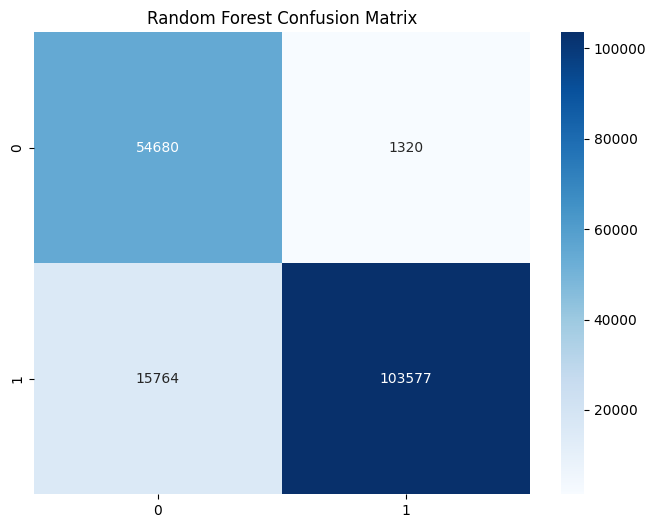


SVM Performance:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81     56000
           1       0.98      0.80      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341



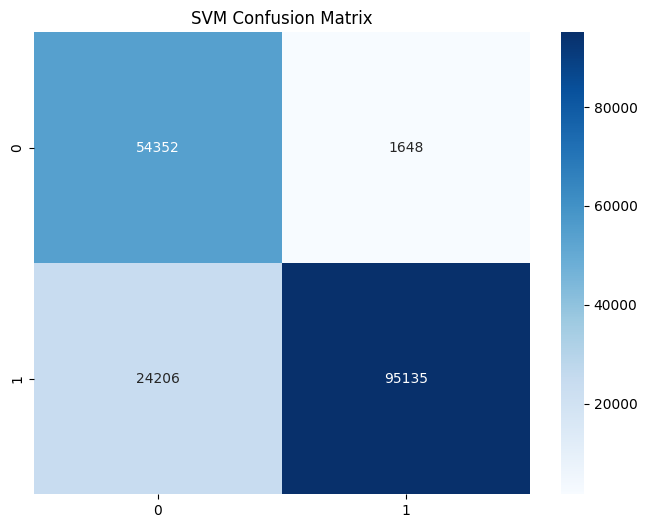

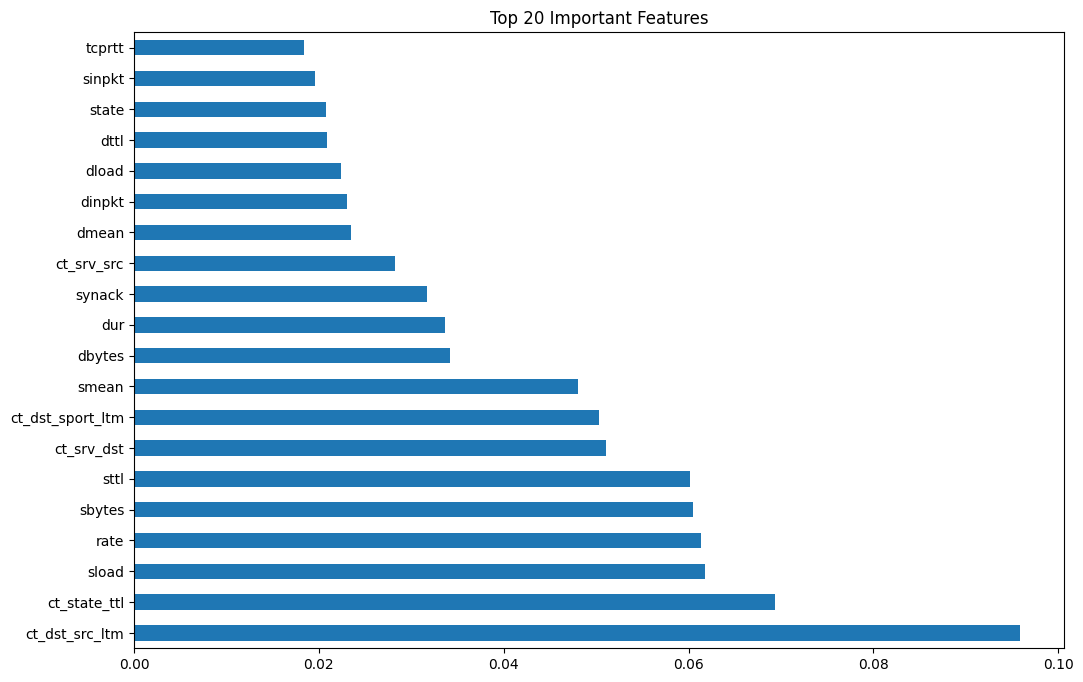

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the dataset path
dataset_path = "/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1"

# Load the main datasets with the correct path
train = pd.read_csv(os.path.join(dataset_path, "UNSW_NB15_training-set.csv"))
test = pd.read_csv(os.path.join(dataset_path, "UNSW_NB15_testing-set.csv"))

# Basic cleaning
def clean_data(df):
    # Remove duplicate columns (those with .1, .2 suffixes)
    df = df.loc[:, ~df.columns.str.contains('\.\d+$')]

    # Drop empty columns
    df = df.dropna(axis=1, how='all')

    # Fill remaining NaNs
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    df[num_cols] = df[num_cols].fillna(0)
    df[cat_cols] = df[cat_cols].fillna('unknown')

    return df

train = clean_data(train)
test = clean_data(test)

# Prepare data
def prepare_data(df, target='label'):
    X = df.drop(['id', 'label', 'attack_cat'], axis=1, errors='ignore')
    y = df[target]

    # Encode categorical features
    cat_cols = X.select_dtypes(include=['object']).columns
    for col in cat_cols:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    return X, y

X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation
def train_evaluate(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate(rf, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest")

# SVM (on subset if large)
if len(X_train_scaled) > 50000:
    sample_idx = np.random.choice(len(X_train_scaled), 50000, replace=False)
    X_train_sample = X_train_scaled[sample_idx]
    y_train_sample = y_train.iloc[sample_idx]
else:
    X_train_sample = X_train_scaled
    y_train_sample = y_train

svm = SVC(kernel='rbf', random_state=42)
train_evaluate(svm, X_train_sample, y_train_sample, X_test_scaled, y_test, "SVM")

# Feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(12,8))
feature_imp.nlargest(20).plot(kind='barh')
plt.title("Top 20 Important Features")
plt.show()


Security-Optimized Random Forest (Threshold = 0.0000):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56000
           1       0.68      1.00      0.81    119341

    accuracy                           0.68    175341
   macro avg       0.34      0.50      0.40    175341
weighted avg       0.46      0.68      0.55    175341



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


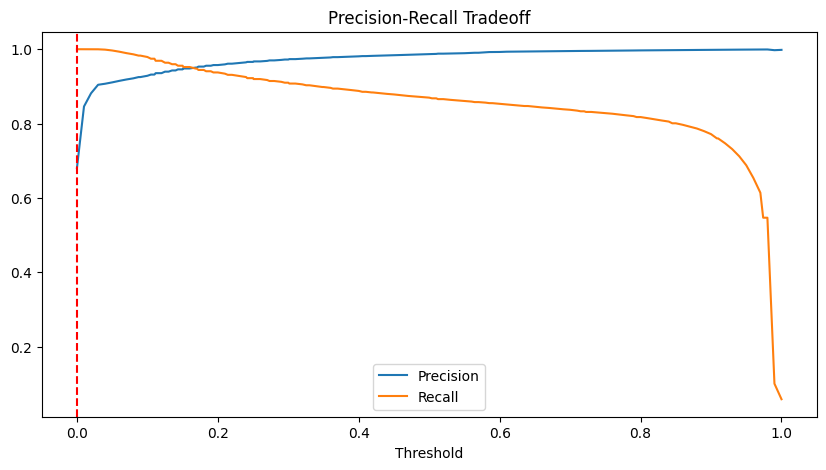

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

# Get prediction probabilities
y_probs = rf.predict_proba(X_test_scaled)[:,1]

# Find optimal threshold for security (prioritize attack recall)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Fix: Align the lengths of recall and thresholds
recall_filtered = recall[:-1]  # Remove the last element of recall

# Find the index where recall first exceeds 0.95
security_threshold_index = np.argmax(recall_filtered > 0.95)
security_threshold = thresholds[security_threshold_index]

# Apply new threshold
y_pred_secure = (y_probs >= security_threshold).astype(int)

# Evaluate
print("\nSecurity-Optimized Random Forest (Threshold = %.4f):" % security_threshold)
print(classification_report(y_test, y_pred_secure))

# Plot threshold analysis
plt.figure(figsize=(10,5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(security_threshold, color='red', linestyle='--')
plt.title('Precision-Recall Tradeoff')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [ ]:
# Select top 20 features
top_20_features = feature_imp.nlargest(20).index
X_train_top = X_train[top_20_features]
X_test_top = X_test[top_20_features]

# Scale selected features
scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_top)
X_test_top_scaled = scaler_top.transform(X_test_top)

# Train on top features
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top_scaled, y_train)

# Evaluate
y_pred_top = rf_top.predict(X_test_top_scaled)
print("\nRandom Forest (Top 20 Features):")
print(classification_report(y_test, y_pred_top))

# Import roc_auc_score
from sklearn.metrics import roc_auc_score # Importing the missing function

# Compare AUC scores
print("AUC Scores:")
print(f"Full features: {roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]):.4f}")
print(f"Top 20 features: {roc_auc_score(y_test, rf_top.predict_proba(X_test_top_scaled)[:,1]):.4f}")


Random Forest (Top 20 Features):
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     56000
           1       0.99      0.86      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341

AUC Scores:
Full features: 0.9860
Top 20 features: 0.9819


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_top_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_top_scaled)
print("\nXGBoost (Top 20 Features):")
print(classification_report(y_test, y_pred_xgb))

# AUC Score
auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test_top_scaled)[:,1])
print(f"XGBoost AUC Score: {auc_xgb:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:02:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost (Top 20 Features):
              precision    recall  f1-score   support

           0       0.76      0.98      0.86     56000
           1       0.99      0.85      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.92      0.89    175341
weighted avg       0.92      0.89      0.90    175341

XGBoost AUC Score: 0.9851


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
lgbm.fit(X_train_top_scaled, y_train)

y_pred_lgbm = lgbm.predict(X_test_top_scaled)
print("\nLightGBM (Top 20 Features):")
print(classification_report(y_test, y_pred_lgbm))

# AUC Score
auc_lgbm = roc_auc_score(y_test, lgbm.predict_proba(X_test_top_scaled)[:,1])
print(f"LightGBM AUC Score: {auc_lgbm:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 45332, number of negative: 37000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 82332, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550600 -> initscore=0.203095
[LightGBM] [Info] Start training from score 0.203095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM (Top 20 Features):
              precision    recall  f1-score   support

           0       0.76      0.98      0.86     56000
           1       0.99      0.86      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM AUC Score: 0.9856


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                 param_grid, cv=5, n_iter=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train_top_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_top_scaled)
print("\nBest Tuned XGBoost Model:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Tuned XGBoost Model:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     56000
           1       0.99      0.86      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



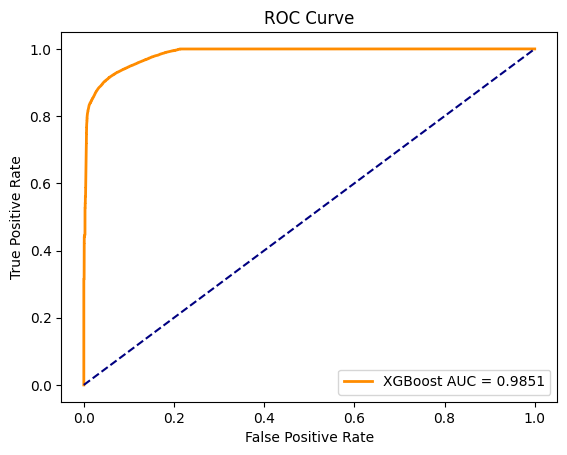

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test_top_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


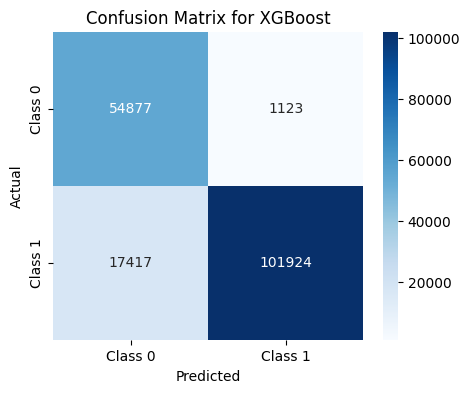

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, xgb.predict(X_test_top_scaled))

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


In [ ]:
import pandas as pd
import os

# Path to your CSV files
csv_folder = "/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1"
  # Change this to the folder where your CSVs are stored

# List all CSV files in the folder
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Iterate through each CSV and print details
for file in csv_files:
    file_path = os.path.join(csv_folder, file)
    df = pd.read_csv(file_path)

    print(f"\n📂 **File:** {file}")
    print(f"🔢 Number of entries: {df.shape[0]}")  # Number of rows
    print(f"🔠 Number of columns: {df.shape[1]}")  # Number of columns
    print(f"📝 Column Names: {list(df.columns)}")  # List of column names
    print(f"❓ Missing Values:\n{df.isnull().sum()}")  # Count missing values per column
    print("="*50)



📂 **File:** UNSW_NB15_testing-set.csv
🔢 Number of entries: 175341
🔠 Number of columns: 45
📝 Column Names: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
❓ Missing Values:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss        

<ipython-input-17-06ed40987d37>:14: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



📂 **File:** UNSW-NB15_2.csv
🔢 Number of entries: 700000
🔠 Number of columns: 49
📝 Column Names: ['59.166.0.0', '6055', '149.171.126.5', '54145', 'tcp', 'FIN', '0.072974', '4238', '60788', '31', '29', '7', '30', '-', '458245.4375', '6571546.5', '72', '72.1', '255', '255.1', '1003293149', '1003585034', '59', '844', '0', '0.1', '62.04531', '61.899776', '1421955842', '1421955842.1', '1.02269', '0.997042', '0.002317', '0.002173', '0.000144', '0.2', '0.3', '0.4', '0.5', '0.6', '13', '13.1', '6', '7.1', '1', '1.1', '2', 'Unnamed: 47', '0.7']
❓ Missing Values:
59.166.0.0            0
6055                  0
149.171.126.5         0
54145                 0
tcp                   0
FIN                   0
0.072974              0
4238                  0
60788                 0
31                    0
29                    0
7                     0
30                    0
-                     0
458245.4375           0
6571546.5             0
72                    0
72.1                  0
255     

<ipython-input-17-06ed40987d37>:14: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



📂 **File:** UNSW-NB15_1.csv
🔢 Number of entries: 700000
🔠 Number of columns: 49
📝 Column Names: ['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055', '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375', '621800.9375', '2', '2.1', '0.2', '0.3', '0.4', '0.5', '66', '82', '0.6', '0.7', '0.8', '0.9', '1421927414', '1421927414.1', '0.017', '0.013', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '3', '7', '1', '3.1', '1.1', '1.2', '1.3', 'Unnamed: 47', '0.18']
❓ Missing Values:
59.166.0.0            0
1390                  0
149.171.126.6         0
53                    0
udp                   0
CON                   0
0.001055              0
132                   0
164                   0
31                    0
29                    0
0                     0
0.1                   0
dns                   0
500473.9375           0
621800.9375           0
2                     0
2.1                   0
0.2                   0
0.3                   0


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 1646: invalid start byte